In [10]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

## Read the scraped reviews text data file :

In [12]:
data = pd.read_csv('D:/Yogabar/Solution/data/review_text_data.csv')

In [14]:
data.head()

,reviews
0,\r\n\r\n It's very tasty and affordable and filled with all the goodies needed for your diet\r\n\r\n
1,"\r\n\r\n I really want to applaud the ppl at yogabar who come up with such great combinations, the perfect taste, they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!\r\n\r\n"
2,"\r\n\r\n Morning breakfast is now easy with this delicious crunchy muesli. Me being a fruits and nuts lover, loved it and it has all berries which gives awesome taste. All healthy ingredients like oats, brown rice flakes, raisins, cranberries, apricots. Black currants ,quinoa, pumpkin, chia and flax seeds, this is a combined mixture of all healthy foods. Just 200 calories and I am sorted in morning. Tastes best with cold milk. Even it makes a great dry snacking option anytime during the day. Perfect when you are on balanced diet and will recommend you all to give it a try.\r\n\r\n"
3,"\r\n\r\n I'm a big fan of Yogabar range of Mueslis and order them frequently. I decided to buy the 700 gm super saver pack when it was cheaper during the great Indian sale. Got it for Rs 349. However, the pack was full of lumps rather than the usual consistency. It was really annoying as it altered the taste a lot. All the lumps were overtly sweet and rest of the muesli was dry and tasteless. Moreover, they didn't dissolve in milk and by the time it did, the rest of the cereal got soggy. I really hope it was a one time thing and won't happen again in the future. I'm still waiting to hear from Yogabars.Hope this review is helpful.\r\n\r\n"
4,"\r\n\r\n Quality of product has deteriorated badly. The two boxes I purchased got ""burnt grains"". Also some of the seeds float when milk is put, meaning the company is now using expired items. Even the rasins are put like lump of balls...Only thing that is good is the packing... not the actual product.Anyway, this company planned that they will initially gain customer confidence, get good rating and later give 3rd class product.Very disappointing...\r\n\r\n"


## Remove escape sequences (`/n`,`/r`..) from review text in `df`:

In [16]:
df = data.copy()
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True) 

In [ ]:
df.sample(20)

In [19]:
df.size

869

## Drop duplicate `reviews` from `df` (if any) :

In [21]:
df.drop_duplicates(subset = "reviews", keep = False, inplace = True) 

In [ ]:
df.size

In [24]:
import nltk
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [26]:
import string   
import re

## Remove punctuations and emojis :

In [28]:
def remove_punct_emoji(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text.encode('ascii', 'ignore').decode('ascii')

df['reviews_punct'] = df['reviews'].apply(lambda x: remove_punct_emoji(x))

## Tokenize the reviews to generate a list of words

In [30]:
def tokenize(text):
    text = re.split('\W+', text)
    return text

df['reviews_tokenized'] = df['reviews_punct'].apply(lambda x: tokenize(x.lower()))

## Remove `stopwords` from `text`:

In [32]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['reviews_nonstop'] = df['reviews_tokenized'].apply(lambda x: remove_stopwords(x))

In [34]:
## Reduce tokenized words to root form :

In [36]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['reviews_stemmed'] = df['reviews_nonstop'].apply(lambda x: stemming(x))

In [38]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed,sentiment_score,review_category
313,I have order two boxes and even paid amount for two boxe but today received ony one box,I have order two boxes and even paid amount for two boxe but today received ony one box,"[, i, have, order, two, boxes, and, even, paid, amount, for, two, boxe, but, today, received, ony, one, box]","[, order, two, boxes, even, paid, amount, two, boxe, today, received, ony, one, box]","[, order, two, box, even, paid, amount, two, box, today, receiv, oni, one, box]",0.0000,neutral
88,"The amount of essence is way to much,xan know artificial smell of strawberry added to it.Indeed got throat infection due to it",The amount of essence is way to muchxan know artificial smell of strawberry added to itIndeed got throat infection due to it,"[, the, amount, of, essence, is, way, to, muchxan, know, artificial, smell, of, strawberry, added, to, itindeed, got, throat, infection, due, to, it]","[, amount, essence, way, muchxan, know, artificial, smell, strawberry, added, itindeed, got, throat, infection, due]","[, amount, essenc, way, muchxan, know, artifici, smell, strawberri, ad, itinde, got, throat, infect, due]",0.0000,neutral
381,Good tasty product,Good tasty product,"[, good, tasty, product]","[, good, tasty, product]","[, good, tasti, product]",0.4404,positive
690,Flavour with whole good seeds,Flavour with whole good seeds,"[, flavour, with, whole, good, seeds]","[, flavour, whole, good, seeds]","[, flavour, whole, good, seed]",0.4404,positive
412,Very good taste.,Very good taste,"[, very, good, taste]","[, good, taste]","[, good, tast]",0.4927,positive
832,I really like this product. This multi grain and musli flavor serial is very healthy. My body feel very energetic after eating this in morning. Value you for money And soon i wanna try their yoga bars as well.,I really like this product This multi grain and musli flavor serial is very healthy My body feel very energetic after eating this in morning Value you for money And soon i wanna try their yoga bars as well,"[, i, really, like, this, product, this, multi, grain, and, musli, flavor, serial, is, very, healthy, my, body, feel, very, energetic, after, eating, this, in, morning, value, you, for, money, and, soon, i, wanna, try, their, yoga, bars, as, well]","[, really, like, product, multi, grain, musli, flavor, serial, healthy, body, feel, energetic, eating, morning, value, money, soon, wanna, try, yoga, bars, well]","[, realli, like, product, multi, grain, musli, flavor, serial, healthi, bodi, feel, energet, eat, morn, valu, money, soon, wanna, tri, yoga, bar, well]",0.9096,positive
307,Yogabar is so natural and tasy .It's packaging is too good and new manf dateYogabar is available at very low priceAnd really very helpful for my body and health.I really like it,Yogabar is so natural and tasy Its packaging is too good and new manf dateYogabar is available at very low priceAnd really very helpful for my body and healthI really like it,"[, yogabar, is, so, natural, and, tasy, its, packaging, is, too, good, and, new, manf, dateyogabar, is, available, at, very, low, priceand, really, very, helpful, for, my, body, and, healthi, really, like, it]","[, yogabar, natural, tasy, packaging, good, new, manf, dateyogabar, available, low, priceand, really, helpful, body, healthi, really, like]","[, yogabar, natur, tasi, packag, good, new, manf, dateyogabar, avail, low, priceand, realli, help, bodi, healthi, realli, like]",0.8724,positive
608,Attracting flavor.. Nicely packed..,Attracting flavor Nicely packed,"[, attracting, flavor, nicely, packed]","[, attracting, flavor, nicely, packed]","[, attract, flavor, nice, pack]",0.7184,positive
497,Eat anytime is better than this one,Eat anytime is better than this one,"[, eat, anytime, is, better, than, this, one]","[, eat, anytime, better, one]","[, eat, anytim, better, one]",0.4404,positive
632,Awesome product. Quite happy with the taste. No regrets in 

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

## Generate `score` of any input `sentence`:

In [44]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

## Generate compound score of a review/`text` :

In [45]:
def compound_score(text):
    comp = sentiment_analyzer_scores(text)
    return comp['compound']

## Classify review as positive, negative and neutral as according to `score` :

In [46]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

## Adding `sentiment_score` and `review_category` fields to `df` :

In [47]:
df['sentiment_score'] = df['reviews'].apply(lambda x:compound_score(x))
df['review_category'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [48]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed,sentiment_score,review_category
255,"Throw in some milk (I like cold), fresh fruits, nuts and you have a wholesome breakfast",Throw in some milk I like cold fresh fruits nuts and you have a wholesome breakfast,"[, throw, in, some, milk, i, like, cold, fresh, fruits, nuts, and, you, have, a, wholesome, breakfast]","[, throw, milk, like, cold, fresh, fruits, nuts, wholesome, breakfast]","[, throw, milk, like, cold, fresh, fruit, nut, wholesom, breakfast]",0.3612,positive
741,Nyc and healthy,Nyc and healthy,"[, nyc, and, healthy]","[, nyc, healthy]","[, nyc, healthi]",0.4019,positive
50,"Who Doesn't likes Healthy Breakfast. This Yogabar Fruits + nuts and seeds Muesli is so delicious and healthy. Best food for Breakfast with an affordable price. It contains 50% whole grain, 22% Dried Fruits like Raisins, cranberries, strawberries, Blackcurrants. It's a power pack break fast with High Protein and High Fiber .",Who Doesnt likes Healthy Breakfast This Yogabar Fruits nuts and seeds Muesli is so delicious and healthy Best food for Breakfast with an affordable price It contains whole grain Dried Fruits like Raisins cranberries strawberries Blackcurrants Its a power pack break fast with High Protein and High Fiber,"[, who, doesnt, likes, healthy, breakfast, this, yogabar, fruits, nuts, and, seeds, muesli, is, so, delicious, and, healthy, best, food, for, breakfast, with, an, affordable, price, it, contains, whole, grain, dried, fruits, like, raisins, cranberries, strawberries, blackcurrants, its, a, power, pack, break, fast, with, high, protein, and, high, fiber, ]","[, doesnt, likes, healthy, breakfast, yogabar, fruits, nuts, seeds, muesli, delicious, healthy, best, food, breakfast, affordable, price, contains, whole, grain, dried, fruits, like, raisins, cranberries, strawberries, blackcurrants, power, pack, break, fast, high, protein, high, fiber, ]","[, doesnt, like, healthi, breakfast, yogabar, fruit, nut, seed, muesli, delici, healthi, best, food, breakfast, afford, price, contain, whole, grain, dri, fruit, like, raisin, cranberri, strawberri, blackcurr, power, pack, break, fast, high, protein, high, fiber, ]",0.8596,positive
797,This product can be helpful for diabetes. Pl confirm,This product can be helpful for diabetes Pl confirm,"[, this, product, can, be, helpful, for, diabetes, pl, confirm]","[, product, helpful, diabetes, pl, confirm]","[, product, help, diabet, pl, confirm]",0.4215,positive
207,"This is the best muesli you can get in India, I have tried various brands. This is the only one which my whole family liked.",This is the best muesli you can get in India I have tried various brands This is the only one which my whole family liked,"[, this, is, the, best, muesli, you, can, get, in, india, i, have, tried, various, brands, this, is, the, only, one, which, my, whole, family, liked]","[, best, muesli, get, india, tried, various, brands, one, whole, family, liked]","[, best, muesli, get, india, tri, variou, brand, one, whole, famili, like]",0.7906,positive
288,Product is good but not Value of mony,Product is good but not Value of mony,"[, product, is, good, but, not, value, of, mony]","[, product, good, value, mony]","[, product, good, valu, moni]",-0.1541,negative
209,"They have now almost stopped adding apricot and cranberry. Initially, the product was great and ingredients were generously added. Now, it seems they think they have established themselves. Hence the degradation of quality.",They have now almost stopped adding apricot and cranberry Initially the product was great and ingredients were generously added Now it seems they think they have established themselves Hence the degradation of quality,"[, they, have, now, almost, stopped, adding, apricot, and, cranberry, initially, the, product, was, great, and, ingredients, were, generously, added, now, it, seems, they, think, they, have, established, themselves, hence, the, degradation, of, qual

## Generate Wordcloud for all values of `review_category` :

(-0.5, 399.5, 199.5, -0.5)

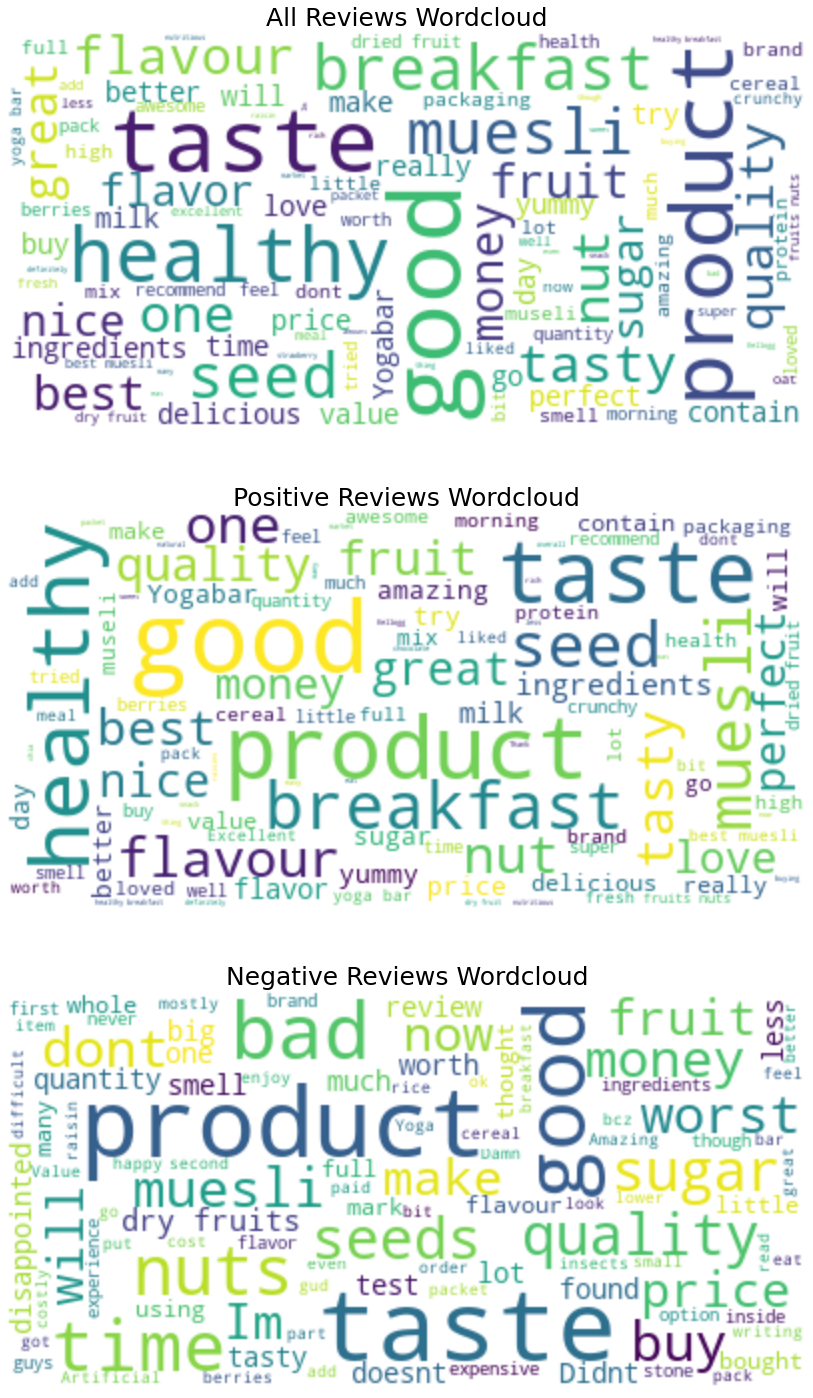

In [49]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Split reviews dataframe (df) to according to positive and negative class
df_positive = df[df['review_category']=='positive']
df_negative = df[df['review_category']=='negative']

# Create Wordcloud strings
reviews_all = " ".join(review for review in df.reviews_punct)
reviews_positive = " ".join(review for review in df_positive.reviews_punct)
reviews_negative = " ".join(review for review in df_negative.reviews_punct)

fig, ax = plt.subplots(3, 1, figsize  = (25,25))

# Generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_all)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_negative)

# Display the generated wordcloud images:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Reviews Wordcloud', fontsize=25)
ax[0].axis('off')
ax[1].imshow(wordcloud_positive, interpolation='bilinear')
ax[1].set_title('Positive Reviews Wordcloud',fontsize=25)
ax[1].axis('off')
ax[2].imshow(wordcloud_negative, interpolation='bilinear')
ax[2].set_title('Negative Reviews Wordcloud',fontsize=25)
ax[2].axis('off')

## Generate Histogram for Distribution of `review_category` :

Text(0.5, 1.0, 'Distribution of Reviews Category')

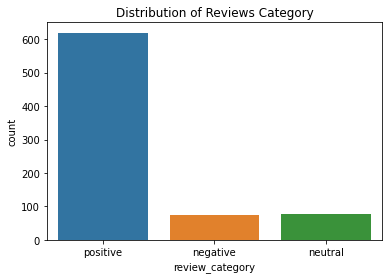

In [50]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")